# Final Project: Phase 1

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import json

import warnings
#warnings.filterwarnings('ignore')

## Loading our Dataset

Let's say we're an up and coming YouTuber (circa 2011-2014), and our goal is to get as popular as fast as possible. To do this, we ask: what types of videos trend and do the best on YouTube?

In [25]:
df = pd.read_csv("./USVideos.csv")

In [26]:
df.shape

(40949, 16)

In [27]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


We have to connect our data from our .json file an meld it into our table.

In [29]:
with open("./US_category_id.json") as f:
    categories = json.load(f)

cat_map = {}
for index,cat in enumerate(categories["items"]):
    cat_map[int(cat["id"])]=cat["snippet"]["title"]

In [30]:
df["category"] = df["category_id"].map(cat_map)

In [31]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


## Exploratory Data Analysis

First, it's always good to get a 5 number summary of our data.

In [32]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


Of course, the numbers for `catagory_id` mean nothing since it's a catagorical attribute.

Let's look at it for real

In [33]:
df["category"].describe()

count             40949
unique               16
top       Entertainment
freq               9964
Name: category, dtype: object

[Text(0, 0, 'People & Blogs'),
 Text(1, 0, 'Entertainment'),
 Text(2, 0, 'Comedy'),
 Text(3, 0, 'Science & Technology'),
 Text(4, 0, 'Film & Animation'),
 Text(5, 0, 'News & Politics'),
 Text(6, 0, 'Sports'),
 Text(7, 0, 'Music'),
 Text(8, 0, 'Pets & Animals'),
 Text(9, 0, 'Education'),
 Text(10, 0, 'Howto & Style'),
 Text(11, 0, 'Autos & Vehicles'),
 Text(12, 0, 'Travel & Events'),
 Text(13, 0, 'Gaming'),
 Text(14, 0, 'Nonprofits & Activism'),
 Text(15, 0, 'Shows')]

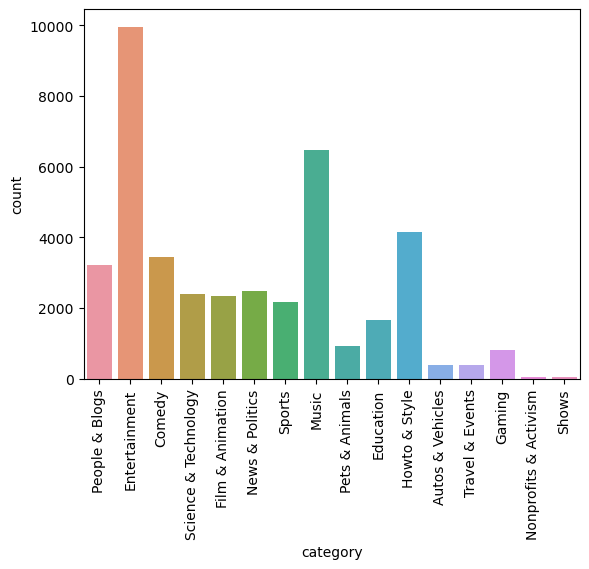

In [34]:
countplot = sns.countplot(x=df["category"])
countplot.set_xticklabels(countplot.get_xticklabels(),rotation=90)

### Selecting a Metric

Now, what do we mean by "do best"? We have four possible numeric items that could signal quality, `views`,`likes`,`dislikes`, and `comment_count`. Do we want to optimize for all of them, or just one?

Let's dig into these variables a bit and figure out what to expect.

In [35]:
# Making a subset of the dataframe
numbers = df[["views","likes","dislikes","comment_count"]]

In [36]:
numbers

,views,likes,dislikes,comment_count
0,748374,57527,2966,15954
1,2418783,97185,6146,12703
2,3191434,146033,5339,8181
3,343168,10172,666,2146
4,2095731,132235,1989,17518
...,...,...,...,...
40944,1685609,38160,1385,2657
40945,1064798,60008,382,3936
40946,1066451,48068,1032,3992
40947,5660813,192957,2846,13088


In [37]:
# We sample a small amount because trying to plot all 40000 rows would be way too slow.
small_sample = numbers.sample(n=100)

/Users/thirusivarajan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


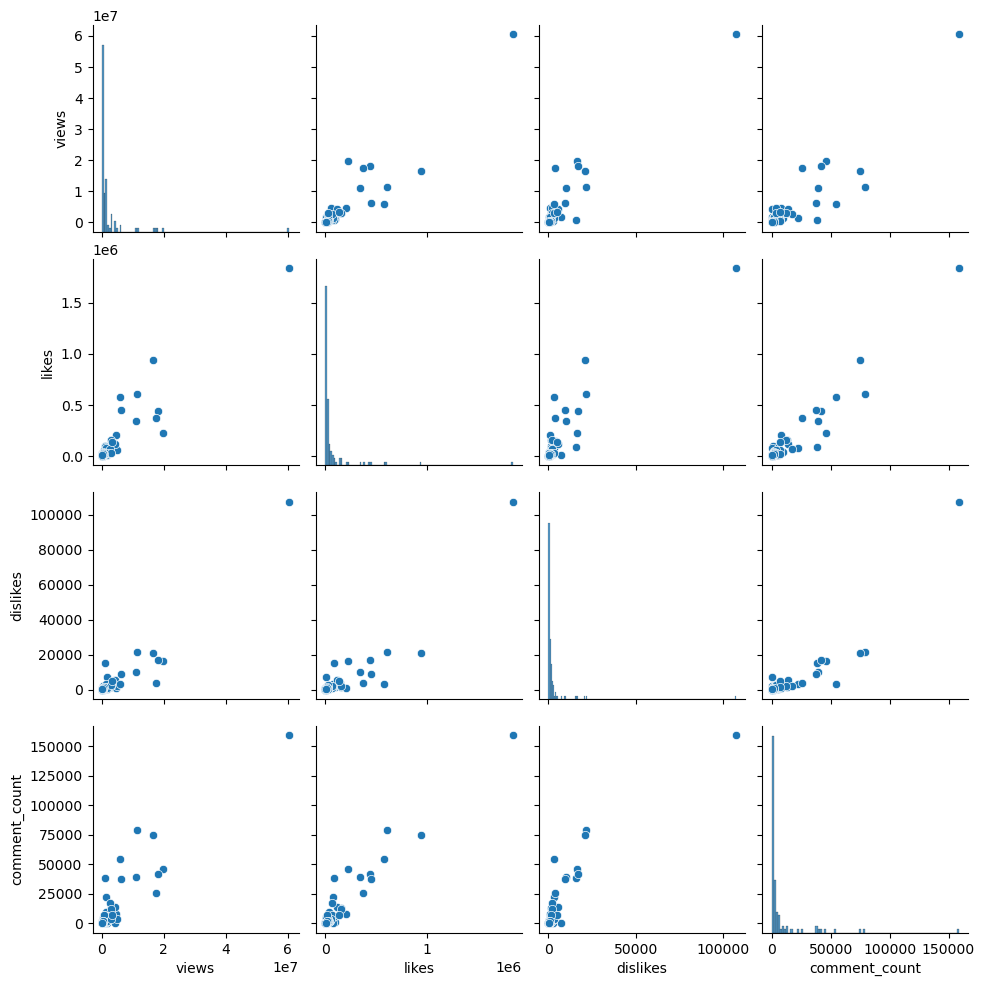

In [38]:
sns.pairplot(small_sample)

Hm, looking at our data, it seems like a lot of it is clustered before growing exponentially. That means just running a simple linear correlation would be unwise.

Also the image is too small, so let's dig a bit more into one variable. 
Let's take `views` as an example.

In [ ]:
sns.histplot(df["views"])

Hm, not much more info. What if we plot it on a log scale?

In [ ]:
sns.histplot(df["views"],log_scale=True)

Woah! That looks *a lot* like a normal distribution. In fact, this is what we call a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution). While this isn't something we'll go in depth, know that normally distributed data plays very nice with many statistical methods: so it's always a good sign.

Using this, let's do a pair plot again, except with all of our data log transformed.

Since we're doing a log transform, we'll run into problems with taking the log of zero values (because $log(0)=-infinity$). 

One of the most common workarounds for this is to just add 1 to each variable, then take the log.

In [ ]:
log_numbers = np.log(numbers+1)

In [ ]:
sns.pairplot(log_numbers)

Now that's looking pretty correlated to me. (Aside from the row of points along each axis)

Now we can see if there's any redundant, highly correlated features.

In [ ]:
log_numbers.corr(method="pearson")

Looks like `(likes, views)` and `(comment count, likes)` are highly correlated. So if we optimize views, likes will probably follow.

**Thus, our goal is to try and predict how many views a video will get based off of the title, description, and tags.**

### Dealing with Dates and Time

Now, for our model, we're not going to use the publish or trending dates. However, it's useful to see how to deal with dates and time when processing data.

Another interesting question. When do videos get popular compared to their publish date?

In [ ]:
times = df[["trending_date","publish_time"]]

In [ ]:
times

These dates are currently in string format. If we want to do more operations on them, we should transform them into a more rich datetime format.

In [ ]:
trending_times = pd.to_datetime(times["trending_date"],format="%y.%d.%m")
trending_times

In [ ]:
# Now, this doesn't look that much different, but now we can do a bunch more interesting conversions. For example, let's get the time in seconds:
# Converting dates into seconds make them easier to plot
trending_times.values.astype(float)

We need to massage the publish time a bit more. Since we don't care about hours and seconds, we can just lop everything past the `T` separator off.

In [ ]:
publish_times = times["publish_time"].str.slice(0,-14)
publish_times.head()

In [ ]:
publish_times = pd.to_datetime(publish_times,format="%Y.%m.%d")
#publish_times = pd.to_datetime(publish_times,format="mixed")
publish_times

In [ ]:
new_times = pd.DataFrame(data={"publish_times":publish_times,"trending_times":trending_times})

In [ ]:
new_times["difference"] = new_times["trending_times"]-new_times["publish_times"]
new_times

In [ ]:
# Let's get a 5 number summary of the difference
new_times.describe()

## Preprocessing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Since our data is a list of tags: we have to be a bit more clever then just doing bag of words on the whole thing. Since for example, the tag "nicholas cage" is different from the tags "nicholas" and "cage".

We use some regex so that our processor captures all of the phrases seperated by a pipe as one word. In addition to this, we strip out all the extra quotes.

In [ ]:
df["tags"].iloc[10]

In [ ]:
vectorizer = CountVectorizer(token_pattern=r"([^|]+)")
vectorizer.fit_transform([df["tags"].iloc[10].replace("\"","")])
vectorizer.get_feature_names_out()

Now let's vectorize the whole dataset

In [ ]:
tag_vectorizer = CountVectorizer(token_pattern=r"([^|]+)")
tag_vectors = tag_vectorizer.fit_transform(df["tags"].str.replace("\"",""))

In [ ]:
tag_vectors.shape

We can do our simple vectorization that we've done before for the descriptions.

In [ ]:
df["description"]

In [ ]:
description_vectorizer = CountVectorizer()
description_vectors = description_vectorizer.fit_transform(df["description"].values.astype('U'))

In [ ]:
description_vectors.shape

In [ ]:
title_vectorizer = CountVectorizer()
title_vectors = title_vectorizer.fit_transform(df["title"])

In [ ]:
title_vectors.shape

## What We Have So Far
Let's take a moment and summarize we have so far.

We want to predict the *number of views* a video will get, based of it's *title*,*category*, *description*, and *tags* (Since those are the variables we can control when making our video).

We then vectorized our title, description, and tags so that we can use them in our models.

In [ ]:
variables = df[["title","category","description","tags","views"]]
variables.head()

In [ ]:
title_vectors.shape

In [ ]:
tag_vectors.shape

In [ ]:
description_vectors.shape

## One Hot Encoding

One hot encoding will take nominal or categorical data and transform it into numeric data.  The process will take all the different categorical features and put them into their own columns and encode a 1 in the column where the row contains that feature.  It may be necessary to take a feature and make it numeric because a specific algortihm can not handle categorical data.   

### Caution:  this data is still nominal after transforming it in this way.

In [ ]:
one_hot_encoded_data = pd.get_dummies(variables, columns = ['category'])
display(one_hot_encoded_data.head())


## Integer Encoding

Integer encoding will take nominal or categorical data and transform it into numeric data, similiar to one hot encoding.  The process will take all the different categorical features and transform them into integers, but all the values will be encoded into one column.  This aproach can keep your feature space small compared to one hot encoding.  It may be necessary to take a feature and make it numeric because a specific algortihm can not handle categorical data.   

### Caution:  this data is still nominal after transforming it in this way.  

In [ ]:
variables = variables.astype({'tags': 'category'})

display(variables.dtypes)

variables['tag_codes'] = variables['tags'].cat.codes
variables.head()